In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('manufacturing_defect_dataset.csv')

In [3]:
data.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:
data.corr()['DefectStatus'].sort_values()

QualityScore           -0.199219
EnergyEfficiency       -0.035031
SafetyIncidents        -0.016039
WorkerProductivity     -0.005224
AdditiveMaterialCost   -0.000953
DowntimePercentage      0.004128
EnergyConsumption       0.005039
DeliveryDelay           0.005425
AdditiveProcessTime     0.005619
InventoryTurnover       0.006733
ProductionCost          0.026720
SupplierQuality         0.038184
StockoutRate            0.040574
ProductionVolume        0.128973
DefectRate              0.245746
MaintenanceHours        0.297107
DefectStatus            1.000000
Name: DefectStatus, dtype: float64

In [5]:
X = data.drop(['DefectStatus'],axis=1)

In [6]:
y = data['DefectStatus']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### GaussianNB

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
gnb_model = GaussianNB()

In [11]:
gnb_model.fit(X_train,y_train)

GaussianNB()

In [12]:
y_pred_gnb = gnb_model.predict(X_test)

In [13]:
#y_pred_gnb

<Axes: ylabel='count'>

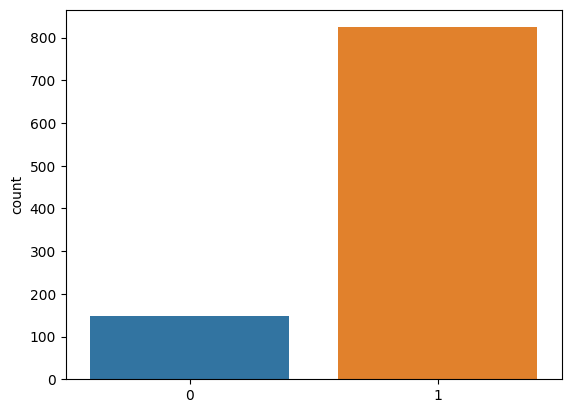

In [14]:
sns.countplot(x=y_test.values)

<Axes: ylabel='count'>

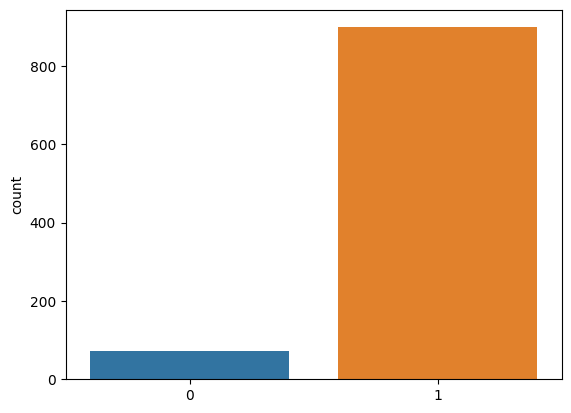

In [15]:
sns.countplot(x=y_pred_gnb)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57       148
           1       0.91      0.99      0.94       824

    accuracy                           0.90       972
   macro avg       0.88      0.71      0.76       972
weighted avg       0.90      0.90      0.89       972



In [18]:
confusion_matrix(y_test,y_pred_gnb)

array([[ 63,  85],
       [ 10, 814]], dtype=int64)

### MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB,CategoricalNB,BernoulliNB,ComplementNB

In [20]:
mnb_model = MultinomialNB()

In [21]:
mnb_model.fit(X_train,y_train)

MultinomialNB()

In [22]:
y_pred_mnb = mnb_model.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.20      0.55      0.29       148
           1       0.88      0.60      0.71       824

    accuracy                           0.59       972
   macro avg       0.54      0.57      0.50       972
weighted avg       0.78      0.59      0.65       972



### BernoulliNB

In [24]:
bnb_model = BernoulliNB()

In [25]:
bnb_model.fit(X_train,y_train)

BernoulliNB()

In [26]:
y_pred_bnb = bnb_model.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       148
           1       0.85      1.00      0.92       824

    accuracy                           0.85       972
   macro avg       0.42      0.50      0.46       972
weighted avg       0.72      0.85      0.78       972



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### ComplementNB

In [28]:
com_model = ComplementNB()

In [29]:
com_model.fit(X_train,y_train)

ComplementNB()

In [30]:
y_pred_com = com_model.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred_com))

              precision    recall  f1-score   support

           0       0.20      0.57      0.30       148
           1       0.88      0.59      0.71       824

    accuracy                           0.59       972
   macro avg       0.54      0.58      0.50       972
weighted avg       0.78      0.59      0.65       972



### CategoricalNB

In [32]:
cat_model = CategoricalNB()

In [33]:
cat_model.fit(X_train,y_train)

CategoricalNB()

In [34]:
y_pred_cat = cat_model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45       148
           1       0.89      0.98      0.93       824

    accuracy                           0.88       972
   macro avg       0.84      0.65      0.69       972
weighted avg       0.87      0.88      0.86       972



# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc_model = RandomForestClassifier()

In [38]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred_rfc = rfc_model.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       148
           1       0.96      0.99      0.98       824

    accuracy                           0.96       972
   macro avg       0.95      0.89      0.91       972
weighted avg       0.96      0.96      0.96       972



In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc_model = DecisionTreeClassifier()

In [63]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred_dtc = dtc_model.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       148
           1       0.96      0.93      0.94       824

    accuracy                           0.91       972
   macro avg       0.81      0.85      0.83       972
weighted avg       0.91      0.91      0.91       972

